In [ ]:
! git clone https://github.com/M-Saqib-essex/Data-Science-and-Decision-Making.git

Cloning into 'Data-Science-and-Decision-Making'...
remote: Enumerating objects: 119, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 119 (delta 21), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (119/119), 2.39 MiB | 6.29 MiB/s, done.
Resolving deltas: 100% (21/21), done.


## Importing Libraries


In [ ]:
# data manipulation libraries
import pandas as pd
import numpy as np
from time import time

# Graphs libraries
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-white')
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from plotly import tools



## Reading CSV file

In [ ]:
data = pd.read_csv('/content/Data-Science-and-Decision-Making/CE888-Finalproject/kent-stop-and-search.csv', na_values=['Unknown', ' '])

## Removing Overwrited Rows




In [ ]:
 # removing overwrite rows 
 data = data[data["Type"]  != "Type"]


In [ ]:

# removing Policing operation column because it has all null values 
#data["Notes"].fillna("No Notes", inplace = True)
data.drop("Policing operation",inplace=True, axis=1)

## Removing null values from Removal of more than just outer clothing

In [ ]:
data['Removal of more than just outer clothing'].fillna(False,inplace = True) 


## Removing null values from dataset

In [ ]:
data = data.dropna()
data.isnull().sum()
data.shape


(23599, 14)

## cleaned dataset

In [ ]:
data.isna().sum()

Type                                        0
Date                                        0
Part of a policing operation                0
Latitude                                    0
Longitude                                   0
Gender                                      0
Age range                                   0
Self-defined ethnicity                      0
Officer-defined ethnicity                   0
Legislation                                 0
Object of search                            0
Outcome                                     0
Outcome linked to object of search          0
Removal of more than just outer clothing    0
dtype: int64

pandas.core.series.Series

## Gender Distribution

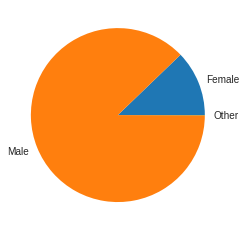

In [ ]:
gender_count = data.groupby("Gender")["Gender"].count()

#data["Gender"].astype('category')
plt.pie(gender_count,labels=["Female","Male","Other"])
plt.show()


## Part of Policing Operation

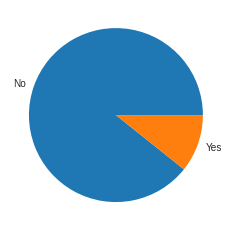

In [ ]:
data["Part of a policing operation"].value_counts()

partof_Policing_Opr = data.groupby("Part of a policing operation")["Part of a policing operation"].count()

#data["Gender"].astype('category')
plt.pie(partof_Policing_Opr,labels=["No","Yes"])
plt.show()

In [ ]:
date_count = data.groupby("Date")["Date"].count()

In [ ]:
plt.pie(date_count)
plt.show()

NameError: ignored

In [ ]:
df_value_counts = data["Gender"].value_counts(sort = False).reset_index()
df_value_counts.columns = ['unique_values', 'counts']


In [ ]:
df_value_counts

,unique_values,counts
0,Other,9
1,Female,2879
2,Male,20711


In [ ]:
data['Date'] = pd.to_datetime(data['Date']).dt.tz_convert('Europe/London')
print(data['Date'])

0       2018-04-01 00:00:00+01:00
1       2018-04-01 00:45:00+01:00
2       2018-04-01 02:00:00+01:00
3       2018-04-01 03:40:00+01:00
4       2018-04-01 03:50:00+01:00
                   ...           
30632   2021-03-31 21:15:00+01:00
30633   2021-03-31 21:58:00+01:00
30634   2021-03-31 22:00:00+01:00
30636   2021-03-31 23:20:00+01:00
30637   2021-03-31 23:30:00+01:00
Name: Date, Length: 23599, dtype: datetime64[ns, Europe/London]


|                                                         |   Legislation |
|:--------------------------------------------------------|--------------:|
| Misuse of Drugs Act 1971 (section 23)                   |         15190 |
| Police and Criminal Evidence Act 1984 (section 1)       |          7193 |
| Criminal Justice and Public Order Act 1994 (section 60) |           938 |
| Firearms Act 1968 (section 47)                          |           157 |
| Poaching Prevention Act 1862 (section 2)                |            92 |
| Environmental Protection Act 1990 (section 34B )        |            26 |
| Wildlife and Countryside Act 1981 (section 19)          |             2 |
| Deer Act 1991 (section 12)                              |             1 |


## Age group

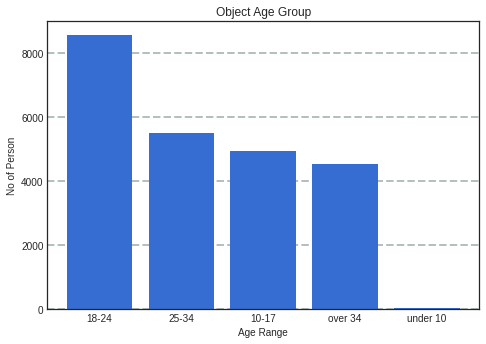

In [ ]:

age_range_counts = data["Age range"].value_counts(sort = True).reset_index()
age_range_counts.columns = ['age range', 'counts']


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(age_range_counts["age range"],age_range_counts["counts"])
plt.xlabel('Age Range')
plt.ylabel('No of Person')
plt.title('Object Age Group')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.bar(range(len(age_range_counts["counts"])), age_range_counts["counts"], color='royalblue', alpha=0.7)
plt.show()



## Search Type 

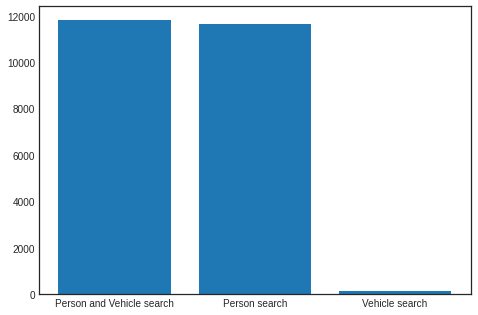

In [ ]:
search_type_counts = data["Type"].value_counts(sort = True).reset_index()
search_type_counts.columns = ['types', 'counts']


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(search_type_counts["types"],search_type_counts["counts"])
plt.show()

## Officer Ethnicity

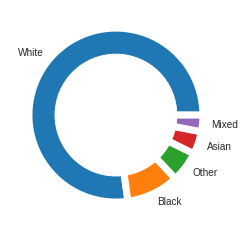

In [ ]:

ethnicity_counts = data["Officer-defined ethnicity"].value_counts(sort = True).reset_index()
ethnicity_counts.columns = ['ethnicity', 'counts']
size_of_groups= ethnicity_counts["counts"]
labels = ethnicity_counts["ethnicity"]
# Create a pieplot
plt.pie(size_of_groups, labels=labels, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
plt.title = "Officer Defined Ethnicity"
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## Object Ethenicity

In [ ]:

print(data["Self-defined ethnicity"].value_counts().to_markdown())

|                                                                                      |   Self-defined ethnicity |
|:-------------------------------------------------------------------------------------|-------------------------:|
| White - English/Welsh/Scottish/Northern Irish/British                                |                    15298 |
| Other ethnic group - Not stated                                                      |                     2569 |
| White - Any other White background                                                   |                     1776 |
| Black/African/Caribbean/Black British - African                                      |                      884 |
| Black/African/Caribbean/Black British - Any other Black/African/Caribbean background |                      763 |
| Asian/Asian British - Any other Asian background                                     |                      527 |
| Black/African/Caribbean/Black British - Caribbean                     

## Legislation

In [ ]:
print(data["Legislation"].value_counts().to_markdown())


|                                                         |   Legislation |
|:--------------------------------------------------------|--------------:|
| Misuse of Drugs Act 1971 (section 23)                   |         15190 |
| Police and Criminal Evidence Act 1984 (section 1)       |          7193 |
| Criminal Justice and Public Order Act 1994 (section 60) |           938 |
| Firearms Act 1968 (section 47)                          |           157 |
| Poaching Prevention Act 1862 (section 2)                |            92 |
| Environmental Protection Act 1990 (section 34B )        |            26 |
| Wildlife and Countryside Act 1981 (section 19)          |             2 |
| Deer Act 1991 (section 12)                              |             1 |


In [ ]:
print(data["Object of search"].value_counts().to_markdown())

|                                       |   Object of search |
|:--------------------------------------|-------------------:|
| Controlled drugs                      |               8619 |
| Psychoactive substances               |               6615 |
| Offensive weapons                     |               3354 |
| Stolen goods                          |               2289 |
| Article for use in theft              |               1637 |
| Evidence of offences under the Act    |                474 |
| Firearms                              |                257 |
| Detailed object of search unavailable |                181 |
| Articles for use in criminal damage   |                173 |


## Object of Search

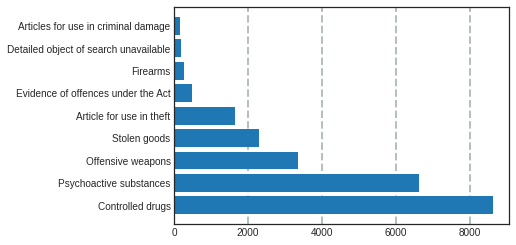

In [ ]:

object_search_counts = data["Object of search"].value_counts(sort = True).reset_index()
object_search_counts.columns = ['object_of_search', 'counts']

# create dataset
height = object_search_counts["counts"]
bars = object_search_counts["object_of_search"]
y_pos = np.arange(len(bars))
plt.barh(y_pos, height)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.7)
plt.yticks(y_pos, bars)
plt.show()

## Outcome

In [ ]:
print(data["Outcome"].value_counts().to_markdown())

|                                 |   Outcome |
|:--------------------------------|----------:|
| A no further action disposal    |     15494 |
| Arrest                          |      3526 |
| Community resolution            |      1976 |
| Khat or Cannabis warning        |      1529 |
| Summons / charged by post       |       763 |
| Penalty Notice for Disorder     |       163 |
| Caution (simple or conditional) |       148 |


## Date

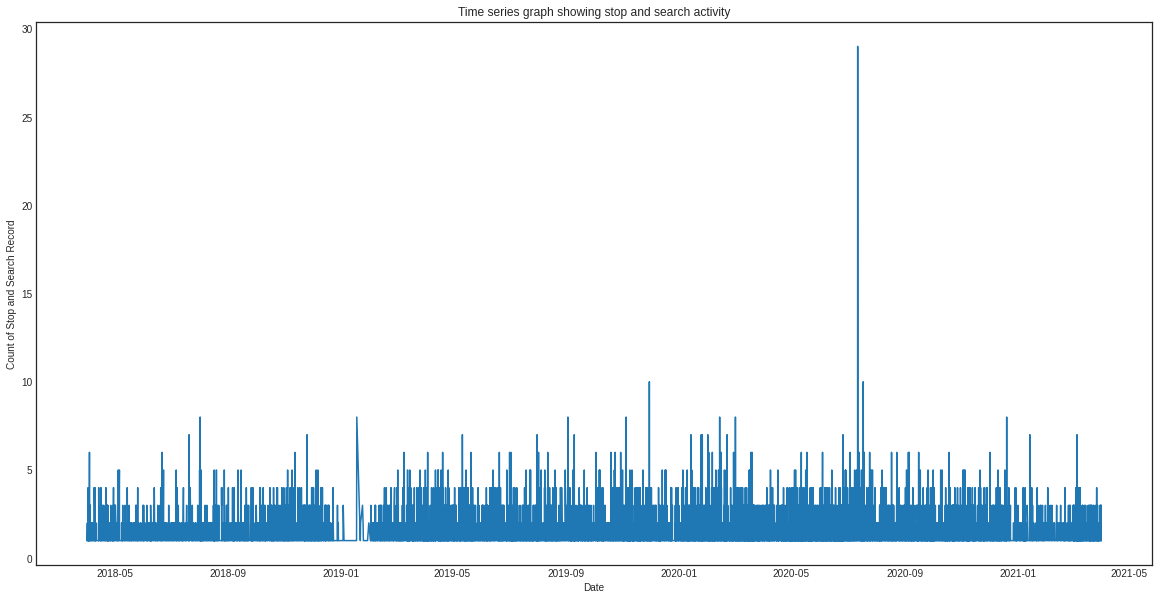

In [ ]:
count_by_date = data.groupby('Date').size()

plt.figure(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Count of Stop and Search Record')
plt.title('Time series graph showing stop and search activity')
plt.plot(count_by_date);

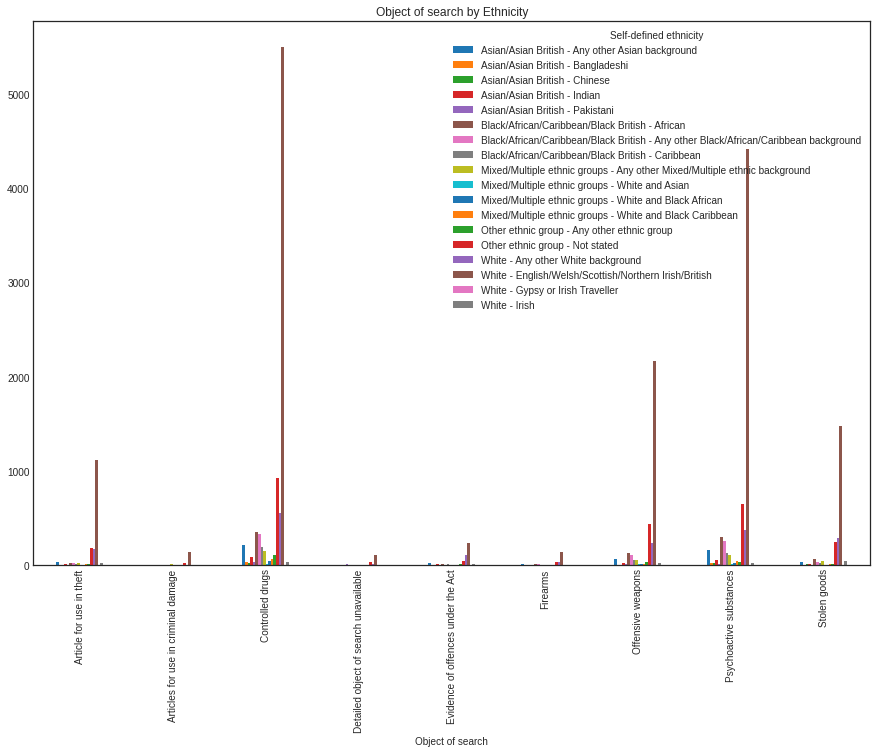

In [ ]:
data.groupby('Self-defined ethnicity')['Object of search'].value_counts().unstack(0).plot.bar(title='Object of search by Ethnicity', figsize=(15,10));

data.groupby('object_of_search')['Age range'].value_counts().unstack(0).plot.bar(title='Age range by Object of Search', figsize=(15,10));

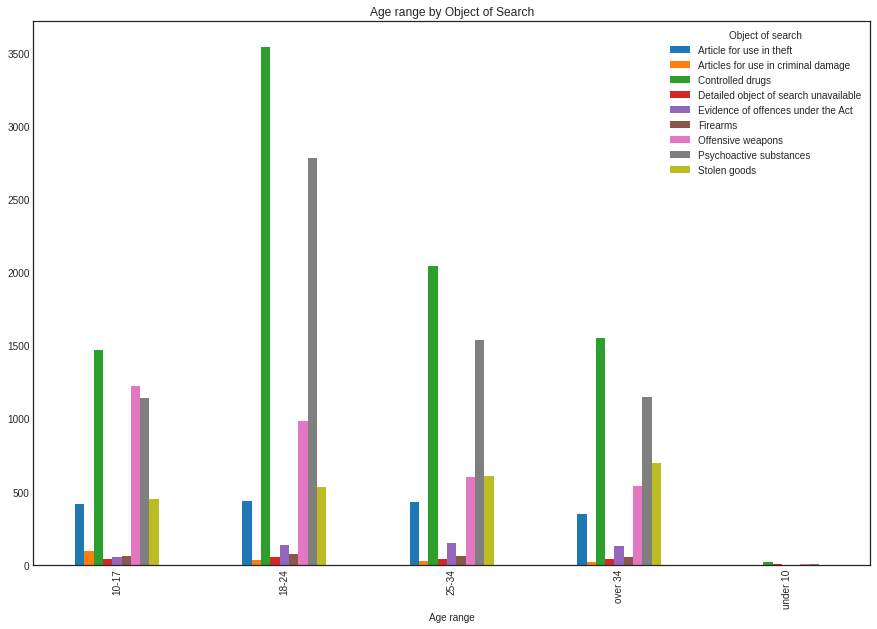

In [ ]:
data.groupby('Object of search')['Age range'].value_counts().unstack(0).plot.bar(title='Age range by Object of Search', figsize=(15,10));

## implementing AIF360

In [ ]:
pip install 'aif360[all]'

     |████████████████████████████████| 184kB 6.8MB/s 
     |████████████████████████████████| 21.2MB 1.3MB/s 
     |████████████████████████████████| 972kB 53.1MB/s 
     |████████████████████████████████| 2.6MB 41.0MB/s 
     |████████████████████████████████| 276kB 42.0MB/s 
     |████████████████████████████████| 9.2MB 22.2MB/s 
     |████████████████████████████████| 358kB 44.5MB/s 
     |████████████████████████████████| 235kB 47.1MB/s 
     |████████████████████████████████| 21.6MB 2.1MB/s 


#### Dataset shape

AttributeError: ignored

In [ ]:
# Libraries to study
from aif360.metrics.utils import compute_boolean_conditioning_vector
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
from aif360.algorithms.preprocessing import LFR, Reweighing
from aif360.algorithms.inprocessing import AdversarialDebiasing, PrejudiceRemover
from aif360.algorithms.postprocessing import CalibratedEqOddsPostprocessing, EqOddsPostprocessing, RejectOptionClassification
from aif360.algorithms.postprocessing.reject_option_classification\
        import RejectOptionClassification

# ML libraries
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, MaxAbsScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf

# Design libraries
from IPython.display import Markdown, display
import warnings
warnings.filterwarnings("ignore")
from ipywidgets import interactive, FloatSlider

ModuleNotFoundError: ignored